In [1]:
import pandas as pd
import sqlite3
import time
import jieba
import re
from wordcloud import WordCloud


conn = sqlite3.connect('../sqlite3/qq.db')
cur = conn.cursor()

cur.execute('select * from groupInfo')
groups = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from member')
members = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from message')
messages = pd.DataFrame(list(cur.fetchall()))

print('1. 全局分析')
print(f'本次分析，群总数为 {groups.shape[0]} 组, 群员总数为 {members.shape[0]} 人, 消息总数为 {messages.shape[0]} 条')
print('---- 开始分析 ----')

1. 全局分析
本次分析，群总数为 67 组, 群员总数为 41346 人, 消息总数为 31258 条
---- 开始分析 ----


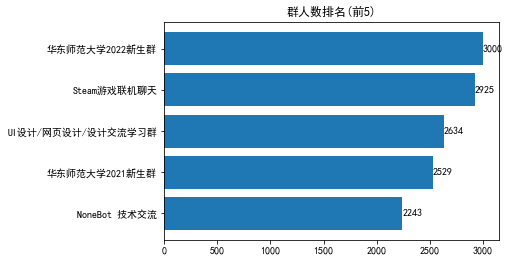

你加入的群中群人数最多的是 华东师范大学2022新生群, 总人数达到了 3000 人!


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
RANK = 5

groups = groups.sort_values(by=2)
groups = groups.reset_index(drop=True)

chart = plt.barh(range(len(groups[1][-RANK:])), groups[2][-RANK:], tick_label=groups[1][-RANK:])
plt.bar_label(chart, label_type='edge')
plt.title(f'群人数排名(前{RANK})')
plt.show()
print(f'你加入的群中群人数最多的是 {groups[1].iloc[-1]}, 总人数达到了 {groups[2].iloc[-1]} 人!')

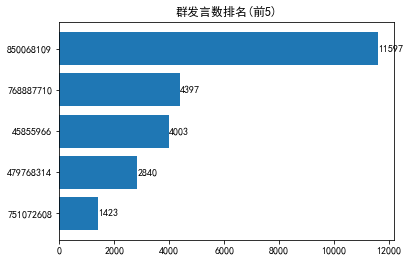

你加入的群中群发言最多的是 Steam游戏联机聊天, 总发言数达到了 11597 条!
接下来的是
群 NoneBot 技术交流, 总发言数达到了 4397 条!
群 独立游戏研究会, 总发言数达到了 4003 条!
群 星际争霸爱好群, 总发言数达到了 2840 条!
群 华东师范大学2022新生群, 总发言数达到了 1423 条!


In [3]:
RANK = 5
messageGroupCount = messages.groupby(2)[2].count().sort_values()

chart = plt.barh(range(RANK), messageGroupCount[-RANK:], tick_label=messageGroupCount.keys()[-RANK:])
plt.bar_label(chart, label_type='edge')
plt.title(f'群发言数排名(前{RANK})')
plt.show()

for i in range(1, RANK + 1):
    if i == 1:
        print(f'你加入的群中群发言最多的是 {groups.loc[groups[0] == messageGroupCount.keys()[-1]].iloc[0, 1]}, 总发言数达到了 {messageGroupCount.iloc[-1]} 条!')
        print(f'接下来的是')
    else:
        print(f'群 {groups.loc[groups[0] == messageGroupCount.keys()[-i]].iloc[0, 1]}, 总发言数达到了 {messageGroupCount.iloc[-i]} 条!')

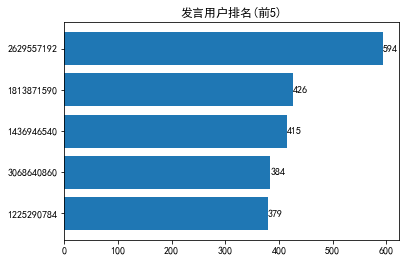

记录到的消息中发言最多的用户是来自群 Steam游戏联机聊天 的 James, 发言数达到了 594!
接下来的是
来自群 红警闲聊群 的 啊对对对, 发言数 426!
来自群 独立游戏研究会 的 我回到冬日离别的车站, 发言数 415!
来自群 Steam游戏联机聊天 的 虎木子, 发言数 384!
来自群 Steam游戏联机聊天 的 Young Jvcki, 发言数 379!


In [4]:
RANK = 5
messageUserCount = messages.groupby(3)[3].count().sort_values()

chart = plt.barh(range(RANK), messageUserCount[-RANK:], tick_label=messageUserCount.keys()[-RANK:])
plt.bar_label(chart, label_type='edge')
plt.title(f'发言用户排名(前{RANK})')
plt.show()

topUser = []
for i in range(1, RANK+1):
    topUser.append(members.loc[members[1] == messageUserCount.keys()[-i]])
    if i == 1:
        print(f'记录到的消息中发言最多的用户是来自群 {groups.loc[groups[0] == topUser[i - 1].iloc[0, 0]].iloc[0, 1]} 的 {topUser[i - 1].iloc[0, 2]}, 发言数达到了 {messageUserCount.iloc[-i]}!')
        print(f'接下来的是')
    else:
        print(f'来自群 {groups.loc[groups[0] == topUser[i - 1].iloc[0, 0]].iloc[0, 1]} 的 {topUser[i - 1].iloc[0, 2]}, 发言数 {messageUserCount.iloc[-i]}!')

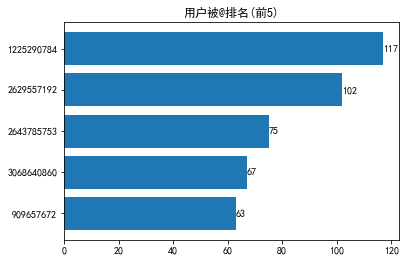

记录到的消息中被 @ 最多的用户是来自群 Steam游戏联机聊天 的 Young Jvcki, 被 @ 数达到了 117!
接下来的是
来自群 Steam游戏联机聊天 的 James, 被 @ 数 102!
来自群 Steam游戏联机聊天 的 浅沫, 被 @ 数 75!
来自群 Steam游戏联机聊天 的 虎木子, 被 @ 数 67!
来自群 Steam游戏联机聊天 的 Tya酱, 被 @ 数 63!


In [5]:
RANK = 5
memberAtCount = {}
for message in messages.values:
    for i in re.findall('\[CQ:at,qq=(.*?)\]', message[5]):
        if i == 'all': continue
        i = int(i)
        if i in memberAtCount:
            memberAtCount[i] += 1
        else:
            memberAtCount[i] = 0

tmp = sorted(memberAtCount.items(), key=lambda x: x[1])
memberAtCount = {}
for v in tmp:
    memberAtCount[v[0]] = v[1]
chart = plt.barh(range(RANK), list(memberAtCount.values())[-RANK:], tick_label=list(memberAtCount.keys())[-RANK:])
plt.bar_label(chart, label_type='edge')
plt.title(f'用户被@排名(前{RANK})')
plt.show()

topUser = []
for i in range(1, RANK+1):
    topUser.append(members.loc[members[1] == list(memberAtCount.keys())[-i]])
    try:
        if i == 1:
            print(f'记录到的消息中被 @ 最多的用户是来自群 {groups.loc[groups[0] == topUser[i - 1].iloc[0, 0]].iloc[0, 1]} 的 {topUser[i - 1].iloc[0, 2]}, 被 @ 数达到了 {list(memberAtCount.values())[-i]}!')
            print(f'接下来的是')
        else:
            print(f'来自群 {groups.loc[groups[0] == topUser[i - 1].iloc[0, 0]].iloc[0, 1]} 的 {topUser[i - 1].iloc[0, 2]}, 被 @ 数 {list(memberAtCount.values())[-i]}!')
    except IndexError:
        print('Missing')

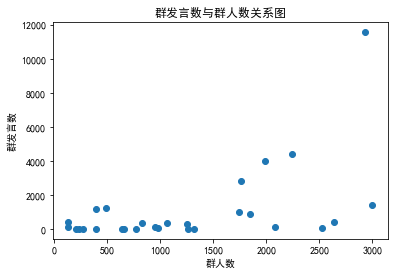

In [6]:
groupMemberCounts = []
for i in messageGroupCount.keys():
    if groups[groups[0] == i].empty:
        groupMemberCounts.append(groups[2].mean())
    else:
        groupMemberCounts.append(groups[groups[0] == i].iloc[0, 2])

plt.scatter(groupMemberCounts, messageGroupCount)
plt.title('群发言数与群人数关系图')
plt.ylabel('群发言数')
plt.xlabel('群人数')
plt.show()

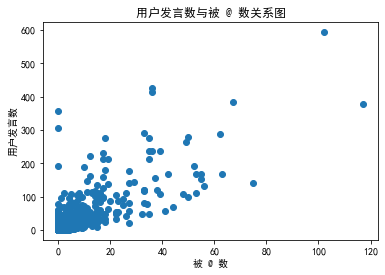

In [7]:
tmp = []
for i in messageUserCount.keys():
    if i in memberAtCount:
        tmp.append(memberAtCount[i])
    else:
        tmp.append(0)
plt.scatter(tmp, messageUserCount)
plt.title('用户发言数与被 @ 数关系图')
plt.ylabel('用户发言数')
plt.xlabel('被 @ 数')
plt.show()

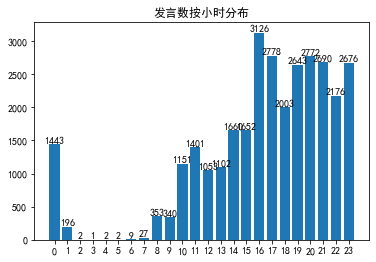

有效性取决于软件开启时间段


In [8]:
messageHourCount = [0] * 24
for message in messages.values:
    messageHourCount[time.localtime(message[6]).tm_hour] += 1

chart = plt.bar(range(24), messageHourCount, tick_label=range(24))
plt.bar_label(chart, label_type='edge')
plt.title(f'发言数按小时分布')
plt.show()
print('有效性取决于软件开启时间段')

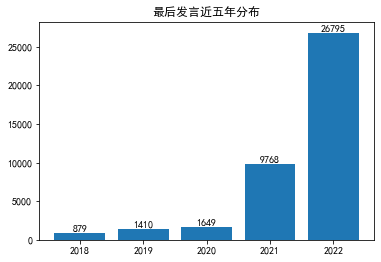

有 879 人只在 2018 年发过话


In [9]:
memberLastSendTimeCount = [0] * 5
for member in members[members[8] != 0].values:
    year = time.localtime(member[8]).tm_year
    if year >= 2018:
         memberLastSendTimeCount[year - 2018] += 1

chart = plt.bar(range(5), memberLastSendTimeCount, tick_label=range(2018, 2023))
plt.bar_label(chart, label_type='edge')
plt.title(f'最后发言近五年分布')
plt.show()
print(f'有 {memberLastSendTimeCount[0]} 人只在 2018 年发过话')

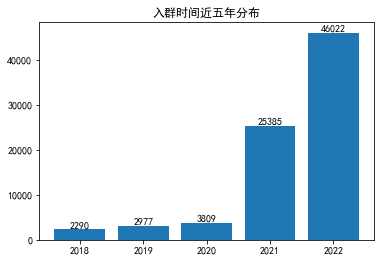

入群时间主要在近两年


In [10]:
memberJoinTimeCount = [0] * 5
for member in members[members[5] != 0].values:
    year = time.localtime(member[5]).tm_year
    if year >= 2018:
         memberLastSendTimeCount[year - 2018] += 1

chart = plt.bar(range(5), memberLastSendTimeCount, tick_label=range(2018, 2023))
plt.bar_label(chart, label_type='edge')
plt.title(f'入群时间近五年分布')
plt.show()
print(f'入群时间主要在近两年')

In [11]:
timeEqualMember = 0
for member in members.values:
    if time.strftime('%Y%m%d', time.localtime(member[5])) == time.strftime('%Y%m%d', time.localtime(member[8])):
        timeEqualMember += 1
print('%d%% 的人入群那天也是最后发言的那天' % (timeEqualMember / members.shape[0] * 100))

40% 的人入群那天也是最后发言的那天


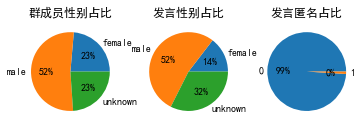

发言占比中男性占比上升了 0%
女性占比上升了 -9%


In [12]:
memberSexCount = members.groupby(4)[4].count()
messageAnonymousCount = messages.groupby(4)[4].count()
messageSexCount = {'female': 0, 'male': 0, 'unknown': 0}
for i in messageUserCount.keys():
    if not members.loc[members[1] == i].empty:
        messageSexCount[members.loc[members[1] == i].iloc[0, 4]] += messageUserCount.loc[i]

plt.subplot(131)
plt.title('群成员性别占比')
plt.pie(memberSexCount, labels=memberSexCount.keys(), autopct='%d%%')
plt.subplot(132)
plt.title('发言性别占比')
plt.pie(messageSexCount.values(), labels=messageSexCount.keys(), autopct='%d%%')
plt.subplot(133)
plt.title('发言匿名占比')
plt.pie(messageAnonymousCount, labels=messageAnonymousCount.keys(), autopct='%d%%')
plt.show()

print('发言占比中男性占比上升了 %d%%' % ((messageSexCount['male'] / sum(messageSexCount.values()) - memberSexCount.loc['male'] / sum(memberSexCount)) * 100))
print('女性占比上升了 %d%%' % ((messageSexCount['female'] / sum(messageSexCount.values()) - memberSexCount.loc['female'] / sum(memberSexCount)) * 100))

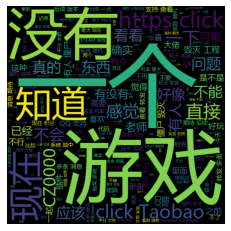

所有记录到的消息的词云图


In [15]:
stopword = []
with open('./stopwords.txt', 'r', encoding='utf8') as file:
    for word in file.readlines():
        stopword.append(word.strip())

text = ''
words = []
def handle(matched):
    return ''
for message in messages.values:
    text += re.sub('\[CQ.*?\]', handle, message[5])
segs = jieba.lcut(text)
for seg in segs:
    words.append(seg)
words = ' '.join([word for word in words if word not in stopword and len(word)>1])
cloudPic = WordCloud(font_path='msyh.ttc', width=500, height=500).generate(words)
# cloudPic.to_file('out/1.png')
plt.imshow(cloudPic)
plt.axis('off')
plt.show()
print('所有记录到的消息的词云图')

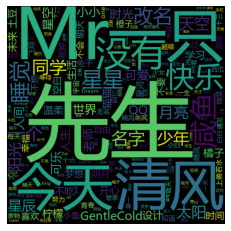

所有成员昵称的词云图


In [16]:
text = ''
words = []
for member in members.values:
    text += member[2]
segs = jieba.lcut(text)
for seg in segs:
    words.append(seg)
words = ' '.join([word for word in words if word not in stopword and len(word)>1])
cloudPic = WordCloud(font_path='msyh.ttc', width=500, height=500).generate(words)
# cloudPic.to_file('out/2.png')
plt.imshow(cloudPic)
plt.axis('off')
plt.show()
print('所有成员昵称的词云图')